In [1]:
# Imports (modules and files)

import sys, os, glob, math
import numpy as np
from ipywidgets import FloatProgress
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

sys.path += [os.getcwd()]

%run darknet_wrapper.py

In [2]:
# Initialize classifier
net, meta = initialize_classifier(config="cfg/yolov3.cfg", weights="weights/yolov3.weights", data="cfg/coco.data")

In [17]:
# Classify Images
data_dir = "./data"
yolo_images_dir = data_dir + "/yolo_test_images"
images = os.listdir(yolo_images_dir)
f = FloatProgress(min=0, max=len(images))
display(f)
results = []
for image in images:
    image_dir = yolo_images_dir + "/" + image
    results += [detect(net, meta, image_dir)]
    f.value += 1

FloatProgress(value=0.0, max=5.0)

IndexError: tuple index out of range

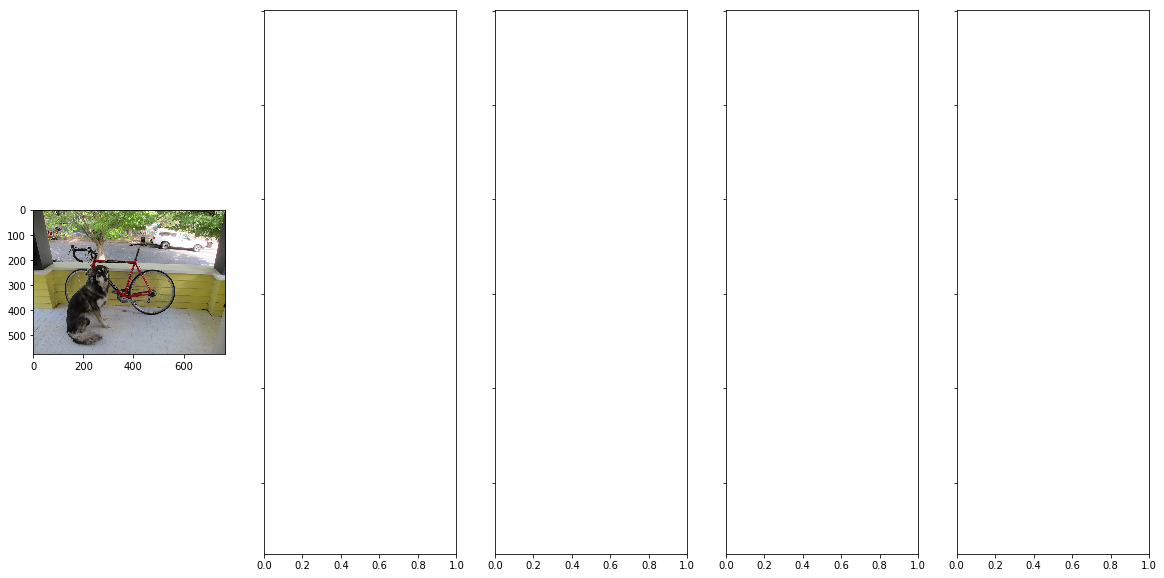

In [18]:
# Plot Results
def plot_result(ax, image, results):
    # Draw bounding boxes into the image
    im = np.array(Image.open(image), dtype=np.uint8)
    # Display the image
    ax.imshow(im)
    # Create a Rectangle patch
    index = 0
    for result in results:
        # format is (class, probability (x,y,width, height)) ANKERED IN THE CENTER!
        width, height = result[2][2], result[2][3]
        x,y = result[2][0]-(width/2), result[2][1]-(height/2)
        rect = patches.Rectangle((x,y),width, height,
                                 linewidth=2,
                                 edgecolor='C' + str(index%10),
                                 facecolor='none',
                                 label="%s (%d%%)" % (result[0], int(result[1]*100)))
        ax.add_patch(rect)
        index += 1

    ax.legend(loc=9, bbox_to_anchor=(0.5, -0.1))

_, axarr = plt.subplots(1, len(images), sharey=True, figsize=(20,10))
for ax, result, image in zip(axarr, results, images):
    image_dir = yolo_images_dir + "/" + image
    plot_result(ax, image_dir, results)
    f.value += 1
    
plt.show()